In [2]:
# set the absolute path where the KIT_4_ABM folder is located
global_path = 'C:/Users/nel_t/Documents/WORK/PROJECTS/a_KIT_4_ABM'   # <--- CHANGE THIS PATH to the one on your computer
code_path   = global_path + '/SRC'

# import the KIT_4_ABM package
import sys
sys.path.append(code_path)
import KIT_4_ABM as kit
import pprint
import numpy as np
import matplotlib.pyplot as plt

In [30]:
def adapt_params(P_dyn, P_rec, name):
    if(name == "uniform"):
        P_dyn["Dynamic_0"]["BEHAVIOR"]["IC"]["alpha"] = 1
        P_rec["filename"] = P_rec["filename"].replace(".h5", "_uniform.h5")
    if(name == "bimodal"):
        P_dyn["Dynamic_0"]["BEHAVIOR"]["IC"]["alpha"] = 0.01
        P_rec["filename"] = P_rec["filename"].replace(".h5", "_bimodal.h5")
    if(name == "unimodal"):
        P_dyn["Dynamic_0"]["BEHAVIOR"]["IC"]["alpha"] = 100
        P_rec["filename"] = P_rec["filename"].replace(".h5", "_unimodal.h5")

def reset_param(P_lay2,P_sim2,P_dyn2,P_rec2):
    P_lay = P_lay2.copy()
    P_dyn = P_dyn2.copy()
    P_sim = P_sim2.copy()
    P_rec = P_rec2.copy()
    adapt_params(P_dyn, P_rec,"unimodal")
    return P_lay, P_sim, P_dyn, P_rec

P_lay, P_dyn, P_sim, P_rec = kit.import_parameters("PAR_desired.json")
P_lay2 = P_lay.copy()
P_dyn2 = P_dyn.copy()
P_sim2 = P_sim.copy()
P_rec2 = P_rec.copy()

n_trials = 1000
for i in range(n_trials):
    P_lay, P_sim, P_dyn, P_rec = reset_param(P_lay2,P_sim2,P_dyn2,P_rec2, "unimodal")
    res = kit.run_sim(P_lay, P_dyn, P_sim, P_rec)
    kit.write_h5(i, P_rec, res)

    P_lay, P_sim, P_dyn, P_rec = reset_param(P_lay2,P_sim2,P_dyn2,P_rec2, "uniform")
    res = kit.run_sim(P_lay, P_dyn, P_sim, P_rec)
    kit.write_h5(i, P_rec, res)

    P_lay, P_sim, P_dyn, P_rec = reset_param(P_lay2,P_sim2,P_dyn2,P_rec2, "bimodal")
    res = kit.run_sim(P_lay, P_dyn, P_sim, P_rec)
    kit.write_h5(i, P_rec, res)

0 of  1000  trials, 1/3
1 of  1000  trials, 1/3
2 of  1000  trials, 1/3
3 of  1000  trials, 1/3
4 of  1000  trials, 1/3
5 of  1000  trials, 1/3
6 of  1000  trials, 1/3
7 of  1000  trials, 1/3
8 of  1000  trials, 1/3
9 of  1000  trials, 1/3
10 of  1000  trials, 1/3
11 of  1000  trials, 1/3
12 of  1000  trials, 1/3
13 of  1000  trials, 1/3
14 of  1000  trials, 1/3
15 of  1000  trials, 1/3
16 of  1000  trials, 1/3
17 of  1000  trials, 1/3
18 of  1000  trials, 1/3
19 of  1000  trials, 1/3
20 of  1000  trials, 1/3
21 of  1000  trials, 1/3
22 of  1000  trials, 1/3
23 of  1000  trials, 1/3
24 of  1000  trials, 1/3
25 of  1000  trials, 1/3
26 of  1000  trials, 1/3
27 of  1000  trials, 1/3
28 of  1000  trials, 1/3
29 of  1000  trials, 1/3
30 of  1000  trials, 1/3
31 of  1000  trials, 1/3
32 of  1000  trials, 1/3
33 of  1000  trials, 1/3
34 of  1000  trials, 1/3
35 of  1000  trials, 1/3
36 of  1000  trials, 1/3
37 of  1000  trials, 1/3
38 of  1000  trials, 1/3
39 of  1000  trials, 1/3
40 of  100

In [31]:
# A  contains N "Simulation_X" object, I want to loop over them
A = kit.load_data_from_h5('Fig1_unimodal.h5')
B = kit.load_data_from_h5('Fig1_uniform.h5')
C = kit.load_data_from_h5('Fig1_bimodal.h5')


S = np.zeros((3,len(A["Simulation_0"]["S-data"])))
I = np.zeros((3,len(A["Simulation_0"]["S-data"])))
R = np.zeros((3,len(A["Simulation_0"]["S-data"])))

for i in range(len(A)):
    I[0,:] += np.array(A["Simulation_"+str(i)]["I-data"])
    S[0,:] += np.array(A["Simulation_"+str(i)]["S-data"])
    R[0,:] += np.array(A["Simulation_"+str(i)]["R-data"])

    I[1,:] += np.array(B["Simulation_"+str(i)]["I-data"])
    S[1,:] += np.array(B["Simulation_"+str(i)]["S-data"])
    R[1,:] += np.array(B["Simulation_"+str(i)]["R-data"])

    I[2,:] += np.array(C["Simulation_"+str(i)]["I-data"])
    S[2,:] += np.array(C["Simulation_"+str(i)]["S-data"])
    R[2,:] += np.array(C["Simulation_"+str(i)]["R-data"])

I = I/len(A)
S = S/len(A)
R = R/len(A)

In [32]:
import numpy as np
import matplotlib.pyplot as plt

path = 'C:/Users/nel_t/Documents/WORK/PROJECTS/NON_REVIEW/plotting_functions/'   # <--- CHANGE THIS PATH to the one on your computer


import sys
sys.path.append(path)
from Pretty_Plot import prettify


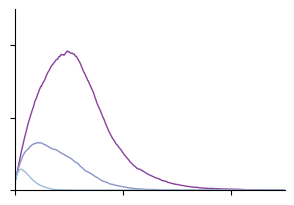

In [40]:

fig_width = 5.8/3*1.8
fig_height = 8.3/3 * 0.85
c0 = "#6e016b"
c1 = "#88419d"
c2 = "#8c6bb1"
c3 = "#8c96c6"
c4 = "#9ebcda"
c5 = "#bfd3e6"
c6 = "#e0ecf4"
c7 = "#f7fcfd"


fig, ax1 = plt.subplots(figsize=(fig_width, fig_height))

ax1.plot(I[0], label="unimodal")
ax1.plot(I[1], label="uniform")
ax1.plot(I[2], label="bimodal")

prettify(ax1, xticks_location = [0,  200, 400],
         yticks_location = [0,  0.01, 0.02], 
         colors = [c1, c3, c4], xlim = [0,500], ylim = [0,0.025], borders = [0, 1], line_width = 1,
         label_size = 16, title_size = 20)
fig.savefig('Fig_1_I.pdf', bbox_inches='tight')

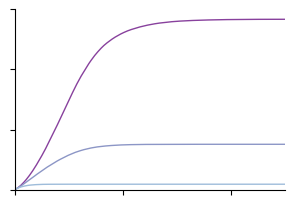

In [39]:
fig, ax1 = plt.subplots(figsize=(fig_width, fig_height))

ax1.plot(1-S[0], label="unimodal")
ax1.plot(1-S[1], label="uniform")
ax1.plot(1-S[2], label="bimodal")

prettify(ax1, xticks_location = [0,  200, 400],
         yticks_location = [0,  0.1, 0.2,  0.3], 
         colors = [c1, c3, c4], xlim = [0,500], ylim = [0,0.3], borders = [0, 1], line_width = 1,
         label_size = 16, title_size = 20)
fig.savefig('Fig_1_S.pdf', bbox_inches='tight')